In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_box(xr, yr, **kwargs):
    return plt.fill([xr[0], xr[1], xr[1], xr[0], xr[0]],
                    [yr[0], yr[0], yr[1], yr[1], yr[0]], **kwargs)
def plot_dreach_box(box, t0, **kwargs):
    return plot_box(t0 + np.array(box["time"]), np.array(box["enclosure"]), **kwargs)

In [3]:
def plot_dreach(data, var, **kwargs):
    t0 = 0
    for step in data["traces"]:
        if step is None:
            continue
        vardict = next(x for x in step if x["key"].startswith(var + "_"))
        boxes = vardict["values"]
        for i in range(len(boxes)-1):
            boxes[i]["time"][1] = boxes[i+1]["time"][0]
        for box in boxes:
            plt_obj, = plot_dreach_box(box, t0, **kwargs)
        t0 = t0 + boxes[-1]["time"][-1]
    return plt_obj

def plot_modes(data, **kwargs):
    t = [0]
    for step in data["traces"]:
        if step is None:
            t.append(t[-1])
            plt.plot([t[-1],t[-1]], [-100,100], **kwargs)
            continue
        plt.plot([t[-1],t[-1]], [-100,100], **kwargs)
        t.append(t[-1] + step[0]["values"][-1]["time"][-1])
    for i in range(len(t)-1):
        center = (t[i] + t[i+1]) / 2.0
        if data["traces"][i]:
            plt.text(center, 1.02*plt.gca().get_ylim()[-1], data["traces"][i][0]["mode"], fontsize=30, color="green")

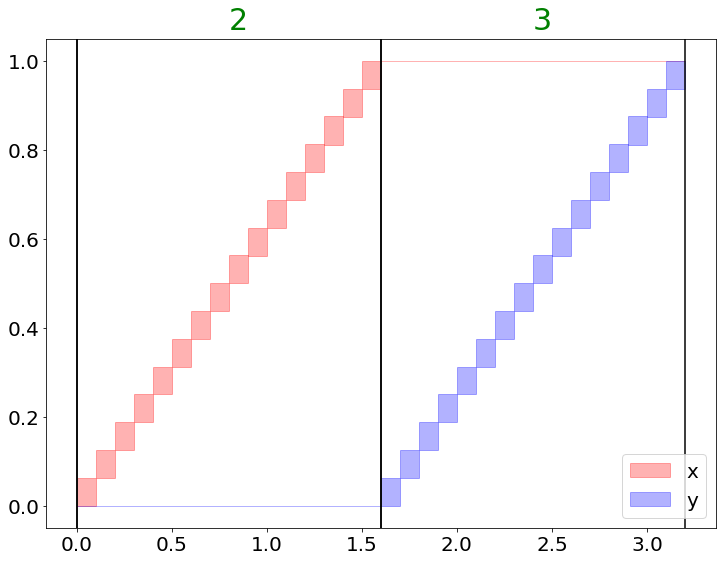

In [7]:
with open("single_int_4_1.smt2.json") as f:
    data = json.loads(f.read())

plt.figure(figsize=(12,9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
x = plot_dreach(data, "x", color="red", alpha=0.3)
y = plot_dreach(data, "y", color="blue", alpha=0.3)
#theta = plot_dreach(data, "theta", color="yellow", alpha=0.3)
plt.gca().set_autoscale_on(False)
plot_modes(data, color="black")
#plt.legend([x, y, theta], ["x", "y", "theta"], fontsize=20)
plt.legend([x, y], ["x", "y"], fontsize=20)
#plt.savefig("manip2.png")